# 다른 차원 축소 기법

### 랜덤 투영 (Radom Projection)

랜덤한 선형 투영을 사용해 데이터를 저차원 공간으로 투영한다.

### 다차원 스케일링 (Multidimensional Scaling, MDS)

샘플간의 거리를 보존하며 차원을 축소한다.

### Isomap

각 샘플을 가장 가까운 이웃과 연결하는 식으로 그래프를 만든 후, 샘플간의 geodesic distance를 유지하며 차원을 축소한다.

### t-SNE (t-Distributed Stochastic Neighbor Embedding)

비슷한 샘플은 가까이, 비슷하지 않은 샘플은 멀리 떨어지도록 하며 차원을 축소한다.

주로 시각화에 많이 사용되며, 특히 고차원 공간의 샘플 군집을 시각화할 때 사용된다. (예:MNIST 데이터셋의 2차원 시각화)

### 선형 판별 분석 (Linear Discriminant Analysis, LDA)

사실상 분류 알고리즘이며, 클래스 사이를 가장 잘 구분하는 축을 학습하여 이 축을 데이터가 투영되는 초평면을 정의하는 데 사용하는 방법이다.

이 알고리즘의 장점은 투영을 통해 가능한 한 클래스를 멀리 떨어지게 유지하므로, 분류 알고리즘을 적용하기 전의 차원 축소에 유용하다.

In [2]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [3]:
from sklearn.manifold import MDS, Isomap, TSNE

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

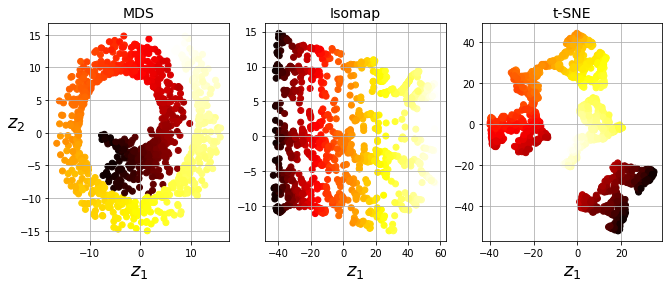

In [4]:
import matplotlib.pyplot as plt

titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()